# Forecasting the EV charging demand for 2019 and 2020

## Preprocessing of the groups formed of original data for forecasting

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#pip install statsmodels

In [ ]:
demand = pd.read_csv(r"/content/drive/MyDrive/Shell_Hack/Demand_History.csv")
infra = pd.read_csv(r"/content/drive/MyDrive/Shell_Hack/exisiting_EV_infrastructure_2018.csv")

In [ ]:
group1 = pd.read_csv(r"/content/drive/MyDrive/Shell_Hack/group1.csv")
group2 = pd.read_csv(r"/content/drive/MyDrive/Shell_Hack/group2.csv")
group3 = pd.read_csv(r"/content/drive/MyDrive/Shell_Hack/group3.csv")

In [ ]:
demand2 = demand.drop(columns = ['x_coordinate','y_coordinate'])

In [ ]:
demand2.set_index('demand_point_index')

,2010,2011,2012,2013,2014,2015,2016,2017,2018
demand_point_index,,,,,,,,,
0,0.352242,0.667932,0.958593,2.911901,4.338274,6.561995,8.454417,10.595324,13.119572
1,0.325940,0.591964,0.862652,2.589068,4.196034,5.745551,8.753195,11.126995,12.020091
2,0.373752,0.591890,0.969733,2.641432,3.541772,5.469161,8.414627,10.115336,14.018254
3,0.420686,0.584055,0.906547,2.378577,3.888121,5.846089,9.083868,12.424885,15.012302
4,0.475621,0.647940,0.981544,2.665400,4.218711,6.776609,8.851107,11.731131,16.355563
...,...,...,...,...,...,...,...,...,...
4091,0.171015,0.334565,0.556055,1.373291,1.837586,2.517146,3.352280,4.149888,5.426193
4092,0.041716,0.061741,0.131291,0.386540,0.755846,0.941116,1.107797,1.309479,2.057450
4093,0.100895,0.180352,0.296299,0.705373,1.300220,1.608609,1.822806,2.333681,3.218519


In [ ]:
demand2 = demand2.T

In [ ]:
demand2.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
demand_point_index,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,4086.000000,4087.000000,4088.000000,4089.000000,4090.000000,4091.000000,4092.000000,4093.000000,4094.000000,4095.000000
2010,0.352242,0.325940,0.373752,0.420686,0.475621,0.380156,0.449348,0.470071,0.537307,0.445734,...,0.114351,0.075160,0.081059,0.083821,0.158356,0.171015,0.041716,0.100895,0.155353,0.209372
2011,0.667932,0.591964,0.591890,0.584055,0.647940,0.725189,0.730466,0.866474,0.833661,0.775279,...,0.185420,0.131877,0.138802,0.158354,0.376271,0.334565,0.061741,0.180352,0.290825,0.340185
2012,0.958593,0.862652,0.969733,0.906547,0.981544,1.076054,1.220484,1.615454,1.622691,1.316209,...,0.489806,0.298811,0.227962,0.393987,0.670141,0.556055,0.131291,0.296299,0.557803,0.749491
2013,2.911901,2.589068,2.641432,2.378577,2.665400,2.762618,2.655187,3.273061,3.366533,3.795858,...,1.285151,0.819191,0.604009,0.966916,1.584710,1.373291,0.386540,0.705373,1.516066,1.904285


In [ ]:
group1.set_index('demand_point_index',inplace=True)
group1.drop(['Unnamed: 0', 'diff','diff%','x_coordinate','y_coordinate'], axis = 1, inplace =True)
group1 = group1.T
group1

demand_point_index,0,2,4,6,7,8,9,14,15,16,...,4060,4069,4077,4079,4087,4088,4089,4091,4092,4093
2010,0.352242,0.373752,0.475621,0.449348,0.470071,0.537307,0.445734,0.414848,0.487664,0.522983,...,0.084549,0.227223,0.224409,0.225630,0.075160,0.081059,0.083821,0.171015,0.041716,0.100895
2011,0.667932,0.591890,0.647940,0.730466,0.866474,0.833661,0.775279,0.793404,0.980087,0.873165,...,0.168034,0.529566,0.510079,0.494460,0.131877,0.138802,0.158354,0.334565,0.061741,0.180352
2012,0.958593,0.969733,0.981544,1.220484,1.615454,1.622691,1.316209,1.173509,1.477986,1.698496,...,0.251803,1.096832,0.940047,0.970362,0.298811,0.227962,0.393987,0.556055,0.131291,0.296299
2013,2.911901,2.641432,2.665400,2.655187,3.273061,3.366533,3.795858,2.425452,3.687865,3.748875,...,0.652659,2.338300,2.433890,2.417702,0.819191,0.604009,0.966916,1.373291,0.386540,0.705373
2014,4.338274,3.541772,4.218711,5.333594,5.442867,5.973267,4.781361,5.334342,5.448200,6.006352,...,1.056526,4.053881,3.655856,4.032444,1.086649,1.012104,1.703340,1.837586,0.755846,1.300220
2015,6.561995,5.469161,6.776609,8.620496,8.681284,10.033183,9.277640,7.514480,9.801253,9.660881,...,1.488017,5.032670,4.218826,4.887162,1.427004,1.158568,2.083558,2.517146,0.941116,1.608609
2016,8.454417,8.414627,8.851107,11.406751,11.135352,13.210567,10.992479,12.641714,11.588539,12.932135,...,1.754259,7.033875,5.842501,6.502035,1.924844,1.350226,2.802044,3.352280,1.107797,1.822806
2017,10.595324,10.115336,11.731131,13.115854,14.708272,17.291626,17.386210,15.196773,17.098008,16.299288,...,1.951389,6.467082,5.956385,6.280958,2.054926,1.598313,3.284002,4.149888,1.309479,2.333681
2018,13.119572,14.018254,16.355563,19.696415,19.367417,21.899847,21.765241,20.469256,22.483465,23.040348,...,3.051318,8.090292,7.607894,8.712870,3.612612,2.643128,4.127373,5.426193,2.057450,3.218519


In [ ]:
#group1 = group1.T
#group1
group1[2]

2010     0.373752
2011     0.591890
2012     0.969733
2013     2.641432
2014     3.541772
2015     5.469161
2016     8.414627
2017    10.115336
2018    14.018254
Name: 2, dtype: float64

In [ ]:
group2.set_index('demand_point_index',inplace=True)
group2.drop(['Unnamed: 0', 'diff','diff%','x_coordinate','y_coordinate'], axis = 1, inplace =True)
group2 = group2.T
group2

demand_point_index,3,5,11,13,18,19,22,26,27,28,...,4050,4053,4063,4064,4068,4070,4075,4078,4081,4082
2010,0.420686,0.380156,0.450948,0.399944,0.375080,0.339077,0.392275,0.454910,0.455643,0.454991,...,0.098805,0.162673,0.213432,0.226820,0.207101,0.215606,0.239965,0.202296,0.235917,0.191955
2011,0.584055,0.725189,0.878253,0.771697,0.758788,0.742506,0.806206,0.833537,0.787137,0.962178,...,0.202675,0.333051,0.469851,0.615687,0.541928,0.547250,0.557375,0.499928,0.551051,0.489726
2012,0.906547,1.076054,1.613146,1.415207,1.425746,1.277927,1.369266,1.162365,1.214728,1.258286,...,0.634752,0.713187,0.963071,1.107955,1.028634,1.062590,0.966741,1.030736,0.995374,0.814113
2013,2.378577,2.762618,3.843270,4.131217,3.955871,3.735420,3.071204,3.121029,3.333434,4.366068,...,1.401163,1.808954,2.517765,2.628851,2.224474,2.281816,2.458886,2.201177,2.176512,2.146823
2014,3.888121,4.220747,6.073805,4.932295,6.019919,5.409353,5.152479,5.089766,5.307336,6.763426,...,2.456434,3.252083,3.923380,4.136987,3.883329,4.278955,3.765202,3.423965,3.801955,3.238926
2015,5.846089,6.760395,8.801257,8.543594,8.542997,8.334803,9.107687,7.353152,7.446316,7.613990,...,3.121449,3.628732,4.722920,5.269183,4.784608,4.672422,4.663197,4.485607,5.043684,5.790506
2016,9.083868,9.331196,13.465387,13.156493,11.514168,11.297446,12.321187,9.970982,10.390050,10.279124,...,4.805061,4.460205,5.117219,7.407512,7.429778,6.877709,7.064817,5.258990,8.847286,7.922029
2017,12.424885,14.743943,20.388238,19.411243,17.835598,16.620369,19.506804,15.082589,15.433555,15.021031,...,5.500078,7.284089,5.813663,10.172522,8.612682,6.948762,9.730179,5.289905,10.704254,9.066444
2018,15.012302,17.559998,23.919582,21.438911,20.117529,18.328206,22.013707,18.315505,18.087088,16.623120,...,6.757085,8.072853,6.896301,11.223320,10.291936,8.357418,11.195980,6.446855,12.153476,10.482351


In [ ]:
group3.set_index('demand_point_index',inplace=True)
group3.drop(['Unnamed: 0', 'diff','diff%','x_coordinate','y_coordinate'], axis = 1, inplace =True)
group3 = group3.T
group3

demand_point_index,1,10,12,20,21,23,25,48,49,78,...,4074,4076,4080,4083,4084,4085,4086,4090,4094,4095
2010,0.325940,0.450974,0.488245,0.316241,0.395090,0.390262,0.366313,0.726440,0.726410,0.398436,...,0.201621,0.232281,0.235311,0.196167,0.215152,0.200659,0.114351,0.158356,0.155353,0.209372
2011,0.591964,0.801138,0.979895,0.750553,0.714790,0.785290,0.745926,1.540135,1.435175,0.849970,...,0.560007,0.533011,0.536900,0.393494,0.443782,0.381468,0.185420,0.376271,0.290825,0.340185
2012,0.862652,1.809061,1.660270,1.292960,1.256790,1.102849,1.260890,2.370532,2.243170,1.290868,...,1.008992,0.954291,1.044896,0.869379,0.866620,0.807225,0.489806,0.670141,0.557803,0.749491
2013,2.589068,3.864236,3.886465,3.835199,2.826873,3.082459,2.906769,6.174644,6.388029,3.751191,...,2.759081,2.435356,2.574779,2.367316,2.220559,2.278266,1.285151,1.584710,1.516066,1.904285
2014,4.196034,6.008675,5.951298,5.356258,4.994442,5.913194,5.425634,14.687515,14.151255,4.745060,...,3.903454,3.658579,3.734686,3.791871,3.115771,3.470540,2.168647,2.272350,2.399426,2.775772
2015,5.745551,9.578958,10.206370,8.968361,8.834654,9.690664,8.796075,20.525185,19.511253,7.399224,...,5.095542,5.176007,4.779940,5.416016,4.539874,4.623179,3.320948,3.635703,2.719197,3.404641
2016,8.753195,12.609366,12.501408,10.375175,12.186952,12.620055,11.983298,27.790928,26.297069,11.193262,...,8.328890,6.194592,7.338983,8.210834,4.076783,7.041708,4.336336,5.880033,4.494515,4.574922
2017,11.126995,21.931329,18.256415,19.293654,20.016465,20.478638,18.602615,46.671168,37.979178,16.713343,...,10.360384,8.517955,10.752326,11.470155,8.909247,9.877114,6.095297,7.672174,6.096858,6.301078
2018,12.020091,22.604693,19.594346,19.869476,18.872922,21.782397,17.696545,44.321731,40.395134,17.829061,...,11.209933,8.402926,10.232385,10.945679,8.335962,8.838567,6.625857,7.833432,6.262574,6.860939


In [ ]:
group1.index = pd.to_datetime(group1.index)
group1.head()

demand_point_index,0,2,4,6,7,8,9,14,15,16,...,4060,4069,4077,4079,4087,4088,4089,4091,4092,4093
2010-01-01,0.352242,0.373752,0.475621,0.449348,0.470071,0.537307,0.445734,0.414848,0.487664,0.522983,...,0.084549,0.227223,0.224409,0.225630,0.075160,0.081059,0.083821,0.171015,0.041716,0.100895
2011-01-01,0.667932,0.591890,0.647940,0.730466,0.866474,0.833661,0.775279,0.793404,0.980087,0.873165,...,0.168034,0.529566,0.510079,0.494460,0.131877,0.138802,0.158354,0.334565,0.061741,0.180352
2012-01-01,0.958593,0.969733,0.981544,1.220484,1.615454,1.622691,1.316209,1.173509,1.477986,1.698496,...,0.251803,1.096832,0.940047,0.970362,0.298811,0.227962,0.393987,0.556055,0.131291,0.296299
2013-01-01,2.911901,2.641432,2.665400,2.655187,3.273061,3.366533,3.795858,2.425452,3.687865,3.748875,...,0.652659,2.338300,2.433890,2.417702,0.819191,0.604009,0.966916,1.373291,0.386540,0.705373
2014-01-01,4.338274,3.541772,4.218711,5.333594,5.442867,5.973267,4.781361,5.334342,5.448200,6.006352,...,1.056526,4.053881,3.655856,4.032444,1.086649,1.012104,1.703340,1.837586,0.755846,1.300220


In [ ]:
group2.index = pd.to_datetime(group2.index)
group2.head()

demand_point_index,3,5,11,13,18,19,22,26,27,28,...,4050,4053,4063,4064,4068,4070,4075,4078,4081,4082
2010-01-01,0.420686,0.380156,0.450948,0.399944,0.375080,0.339077,0.392275,0.454910,0.455643,0.454991,...,0.098805,0.162673,0.213432,0.226820,0.207101,0.215606,0.239965,0.202296,0.235917,0.191955
2011-01-01,0.584055,0.725189,0.878253,0.771697,0.758788,0.742506,0.806206,0.833537,0.787137,0.962178,...,0.202675,0.333051,0.469851,0.615687,0.541928,0.547250,0.557375,0.499928,0.551051,0.489726
2012-01-01,0.906547,1.076054,1.613146,1.415207,1.425746,1.277927,1.369266,1.162365,1.214728,1.258286,...,0.634752,0.713187,0.963071,1.107955,1.028634,1.062590,0.966741,1.030736,0.995374,0.814113
2013-01-01,2.378577,2.762618,3.843270,4.131217,3.955871,3.735420,3.071204,3.121029,3.333434,4.366068,...,1.401163,1.808954,2.517765,2.628851,2.224474,2.281816,2.458886,2.201177,2.176512,2.146823
2014-01-01,3.888121,4.220747,6.073805,4.932295,6.019919,5.409353,5.152479,5.089766,5.307336,6.763426,...,2.456434,3.252083,3.923380,4.136987,3.883329,4.278955,3.765202,3.423965,3.801955,3.238926


In [ ]:
group3.index = pd.to_datetime(group3.index)
group3.head()

demand_point_index,1,10,12,20,21,23,25,48,49,78,...,4074,4076,4080,4083,4084,4085,4086,4090,4094,4095
2010-01-01,0.325940,0.450974,0.488245,0.316241,0.395090,0.390262,0.366313,0.726440,0.726410,0.398436,...,0.201621,0.232281,0.235311,0.196167,0.215152,0.200659,0.114351,0.158356,0.155353,0.209372
2011-01-01,0.591964,0.801138,0.979895,0.750553,0.714790,0.785290,0.745926,1.540135,1.435175,0.849970,...,0.560007,0.533011,0.536900,0.393494,0.443782,0.381468,0.185420,0.376271,0.290825,0.340185
2012-01-01,0.862652,1.809061,1.660270,1.292960,1.256790,1.102849,1.260890,2.370532,2.243170,1.290868,...,1.008992,0.954291,1.044896,0.869379,0.866620,0.807225,0.489806,0.670141,0.557803,0.749491
2013-01-01,2.589068,3.864236,3.886465,3.835199,2.826873,3.082459,2.906769,6.174644,6.388029,3.751191,...,2.759081,2.435356,2.574779,2.367316,2.220559,2.278266,1.285151,1.584710,1.516066,1.904285
2014-01-01,4.196034,6.008675,5.951298,5.356258,4.994442,5.913194,5.425634,14.687515,14.151255,4.745060,...,3.903454,3.658579,3.734686,3.791871,3.115771,3.470540,2.168647,2.272350,2.399426,2.775772


In [ ]:
demand2[0]

demand_point_index     0.000000
2010                   0.352242
2011                   0.667932
2012                   0.958593
2013                   2.911901
2014                   4.338274
2015                   6.561995
2016                   8.454417
2017                  10.595324
2018                  13.119572
Name: 0, dtype: float64

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
demand2.drop('demand_point_index', inplace=True)
demand2

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
2010,0.352242,0.325940,0.373752,0.420686,0.475621,0.380156,0.449348,0.470071,0.537307,0.445734,...,0.114351,0.075160,0.081059,0.083821,0.158356,0.171015,0.041716,0.100895,0.155353,0.209372
2011,0.667932,0.591964,0.591890,0.584055,0.647940,0.725189,0.730466,0.866474,0.833661,0.775279,...,0.185420,0.131877,0.138802,0.158354,0.376271,0.334565,0.061741,0.180352,0.290825,0.340185
2012,0.958593,0.862652,0.969733,0.906547,0.981544,1.076054,1.220484,1.615454,1.622691,1.316209,...,0.489806,0.298811,0.227962,0.393987,0.670141,0.556055,0.131291,0.296299,0.557803,0.749491
2013,2.911901,2.589068,2.641432,2.378577,2.665400,2.762618,2.655187,3.273061,3.366533,3.795858,...,1.285151,0.819191,0.604009,0.966916,1.584710,1.373291,0.386540,0.705373,1.516066,1.904285
2014,4.338274,4.196034,3.541772,3.888121,4.218711,4.220747,5.333594,5.442867,5.973267,4.781361,...,2.168647,1.086649,1.012104,1.703340,2.272350,1.837586,0.755846,1.300220,2.399426,2.775772
2015,6.561995,5.745551,5.469161,5.846089,6.776609,6.760395,8.620496,8.681284,10.033183,9.277640,...,3.320948,1.427004,1.158568,2.083558,3.635703,2.517146,0.941116,1.608609,2.719197,3.404641
2016,8.454417,8.753195,8.414627,9.083868,8.851107,9.331196,11.406751,11.135352,13.210567,10.992479,...,4.336336,1.924844,1.350226,2.802044,5.880033,3.352280,1.107797,1.822806,4.494515,4.574922
2017,10.595324,11.126995,10.115336,12.424885,11.731131,14.743943,13.115854,14.708272,17.291626,17.386210,...,6.095297,2.054926,1.598313,3.284002,7.672174,4.149888,1.309479,2.333681,6.096858,6.301078
2018,13.119572,12.020091,14.018254,15.012302,16.355563,17.559998,19.696415,19.367417,21.899847,21.765241,...,6.625857,3.612612,2.643128,4.127373,7.833432,5.426193,2.057450,3.218519,6.262574,6.860939


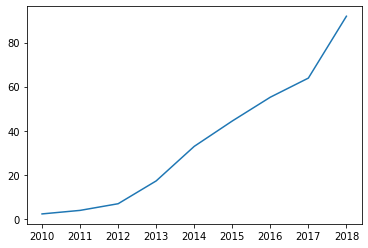

In [ ]:
demand2[40].plot()

In [ ]:
demand2.index = pd.to_datetime(demand2.index)
demand2.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
2010-01-01,0.352242,0.325940,0.373752,0.420686,0.475621,0.380156,0.449348,0.470071,0.537307,0.445734,...,0.114351,0.075160,0.081059,0.083821,0.158356,0.171015,0.041716,0.100895,0.155353,0.209372
2011-01-01,0.667932,0.591964,0.591890,0.584055,0.647940,0.725189,0.730466,0.866474,0.833661,0.775279,...,0.185420,0.131877,0.138802,0.158354,0.376271,0.334565,0.061741,0.180352,0.290825,0.340185
2012-01-01,0.958593,0.862652,0.969733,0.906547,0.981544,1.076054,1.220484,1.615454,1.622691,1.316209,...,0.489806,0.298811,0.227962,0.393987,0.670141,0.556055,0.131291,0.296299,0.557803,0.749491
2013-01-01,2.911901,2.589068,2.641432,2.378577,2.665400,2.762618,2.655187,3.273061,3.366533,3.795858,...,1.285151,0.819191,0.604009,0.966916,1.584710,1.373291,0.386540,0.705373,1.516066,1.904285
2014-01-01,4.338274,4.196034,3.541772,3.888121,4.218711,4.220747,5.333594,5.442867,5.973267,4.781361,...,2.168647,1.086649,1.012104,1.703340,2.272350,1.837586,0.755846,1.300220,2.399426,2.775772


In [ ]:
demand2.index = pd.DatetimeIndex(demand2.index.values,
                               freq=demand2.index.inferred_freq)

## Holts exponential smoothening
We tried different combinations of smoothing levels and smoothing trends for each group in the data to finalize on the hyperparameters <br>
Create 4 different models based on either change or % change with different alpha and beta values <br> <br> 
Example:

2018 = 40

2017 = 100

smooth level = 0.8 trend = 0.2

0.95 * 40 + 0.05*(-60) = 35 

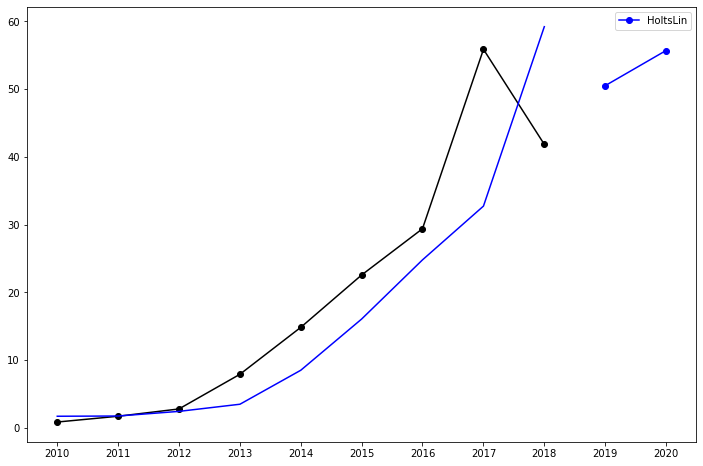

In [ ]:
fit1 = Holt(demand2[1802], initialization_method=None).fit(            #alpha 0.8 beta 0.2
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast1 = fit1.forecast(2).rename("HoltsLin")
plt.figure(figsize=(12, 8))
plt.plot(demand2[1802], marker="o", color="black")
plt.plot(fit1.fittedvalues, color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.legend([line1], [fcast1.name])

In [ ]:
fcast1

2019-01-01    50.489132
2020-01-01    55.676613
Freq: AS-JAN, Name: HoltsLin, dtype: float64

In [ ]:
demand2.columns

RangeIndex(start=0, stop=4096, step=1)

In [ ]:
demand2

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
2010-01-01,0.352242,0.325940,0.373752,0.420686,0.475621,0.380156,0.449348,0.470071,0.537307,0.445734,...,0.114351,0.075160,0.081059,0.083821,0.158356,0.171015,0.041716,0.100895,0.155353,0.209372
2011-01-01,0.667932,0.591964,0.591890,0.584055,0.647940,0.725189,0.730466,0.866474,0.833661,0.775279,...,0.185420,0.131877,0.138802,0.158354,0.376271,0.334565,0.061741,0.180352,0.290825,0.340185
2012-01-01,0.958593,0.862652,0.969733,0.906547,0.981544,1.076054,1.220484,1.615454,1.622691,1.316209,...,0.489806,0.298811,0.227962,0.393987,0.670141,0.556055,0.131291,0.296299,0.557803,0.749491
2013-01-01,2.911901,2.589068,2.641432,2.378577,2.665400,2.762618,2.655187,3.273061,3.366533,3.795858,...,1.285151,0.819191,0.604009,0.966916,1.584710,1.373291,0.386540,0.705373,1.516066,1.904285
2014-01-01,4.338274,4.196034,3.541772,3.888121,4.218711,4.220747,5.333594,5.442867,5.973267,4.781361,...,2.168647,1.086649,1.012104,1.703340,2.272350,1.837586,0.755846,1.300220,2.399426,2.775772
2015-01-01,6.561995,5.745551,5.469161,5.846089,6.776609,6.760395,8.620496,8.681284,10.033183,9.277640,...,3.320948,1.427004,1.158568,2.083558,3.635703,2.517146,0.941116,1.608609,2.719197,3.404641
2016-01-01,8.454417,8.753195,8.414627,9.083868,8.851107,9.331196,11.406751,11.135352,13.210567,10.992479,...,4.336336,1.924844,1.350226,2.802044,5.880033,3.352280,1.107797,1.822806,4.494515,4.574922
2017-01-01,10.595324,11.126995,10.115336,12.424885,11.731131,14.743943,13.115854,14.708272,17.291626,17.386210,...,6.095297,2.054926,1.598313,3.284002,7.672174,4.149888,1.309479,2.333681,6.096858,6.301078
2018-01-01,13.119572,12.020091,14.018254,15.012302,16.355563,17.559998,19.696415,19.367417,21.899847,21.765241,...,6.625857,3.612612,2.643128,4.127373,7.833432,5.426193,2.057450,3.218519,6.262574,6.860939


In [ ]:
f = np.zeros((2,4096), 'float64')
f.shape

(2, 4096)

In [ ]:
forecast = pd.DataFrame(f)
#forecast.set_index(pd.Index(['2019','2020']), inplace=True)
forecast.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
group1.columns

Int64Index([   0,    2,    4,    6,    7,    8,    9,   14,   15,   16,
            ...
            4060, 4069, 4077, 4079, 4087, 4088, 4089, 4091, 4092, 4093],
           dtype='int64', name='demand_point_index', length=1868)

In [ ]:
idx = forecast.index
for id in idx:
  forecast.loc[id,0] = fcast1[id]

forecast.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,50.489132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55.676613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
g1c = group1.columns
idx = forecast.index
for i in g1c:
  fit1 = Holt(group1[i], initialization_method=None).fit(            #alpha 0.8 beta 0.2
    smoothing_level=0.8, smoothing_trend=0.5, optimized=False
  )
  fcast1 = fit1.forecast(2).rename("HoltsLin")
  for id in idx:
    forecast.loc[id,i] = fcast1[id]


forecast.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,15.249980,0.0,16.458523,0.0,19.262241,0.0,22.895519,22.742357,25.755018,26.027080,...,0.0,4.159784,3.034518,4.743233,0.0,6.298625,2.367612,3.708727,0.0,0.0
1,17.495978,0.0,19.262512,0.0,22.644709,0.0,26.894709,26.494620,29.852102,30.510346,...,0.0,4.947915,3.589416,5.412636,0.0,7.279735,2.785926,4.305137,0.0,0.0


In [ ]:
g2c = group2.columns
idx = forecast.index
for i in g2c:
  fit2 = Holt(group2[i], initialization_method=None).fit(            #alpha 0.8 beta 0.2
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
  )
  fcast2 = fit2.forecast(2).rename("HoltsLin")
  for id in idx:
    forecast.loc[id,i] = fcast2[id]


forecast.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,15.249980,0.0,16.458523,16.667323,19.262241,19.562321,22.895519,22.742357,25.755018,26.027080,...,0.0,4.159784,3.034518,4.743233,0.0,6.298625,2.367612,3.708727,0.0,0.0
1,17.495978,0.0,19.262512,18.601011,22.644709,21.892029,26.894709,26.494620,29.852102,30.510346,...,0.0,4.947915,3.589416,5.412636,0.0,7.279735,2.785926,4.305137,0.0,0.0


In [ ]:
g3c = group3.columns
idx = forecast.index
for i in g3c:
  fit3 = Holt(group3[i], initialization_method=None).fit(            #alpha 0.8 beta 0.2
    smoothing_level=0.5, smoothing_trend=0.2, optimized=False
  )
  fcast3 = fit3.forecast(2).rename("HoltsLin")
  for id in idx:
    forecast.loc[id,i] = fcast3[id]


forecast.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,15.249980,13.019315,16.458523,16.667323,19.262241,19.562321,22.895519,22.742357,25.755018,26.027080,...,7.078247,4.159784,3.034518,4.743233,8.661751,6.298625,2.367612,3.708727,6.853416,7.335363
1,17.495978,14.496739,19.262512,18.601011,22.644709,21.892029,26.894709,26.494620,29.852102,30.510346,...,7.890689,4.947915,3.589416,5.412636,9.660197,7.279735,2.785926,4.305137,7.628959,8.147795


In [ ]:
forecast.set_index(pd.Index(['2019','2020']), inplace=True)
forecast.index = pd.to_datetime(forecast.index)
forecast.index = pd.DatetimeIndex(forecast.index.values,
                               freq=forecast.index.inferred_freq)
forecast.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
2019-01-01,15.249980,13.019315,16.458523,16.667323,19.262241,19.562321,22.895519,22.742357,25.755018,26.027080,...,7.078247,4.159784,3.034518,4.743233,8.661751,6.298625,2.367612,3.708727,6.853416,7.335363
2020-01-01,17.495978,14.496739,19.262512,18.601011,22.644709,21.892029,26.894709,26.494620,29.852102,30.510346,...,7.890689,4.947915,3.589416,5.412636,9.660197,7.279735,2.785926,4.305137,7.628959,8.147795


In [ ]:
forecast.to_csv(r'forecastfr2.csv',index=True)